In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/rainfall in india 1901-2015.csv")
print(data)

y = data['ANNUAL'].fillna(0)
#print(y)

x = data.drop(['ANNUAL', 'SUBDIVISION'], axis=1).fillna(0)
#print(x)


                    SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0     ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1     ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2     ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3     ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4     ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   
...                         ...   ...   ...    ...   ...    ...    ...    ...   
4111                LAKSHADWEEP  2011   5.1    2.8   3.1   85.9  107.2  153.6   
4112                LAKSHADWEEP  2012  19.2    0.1   1.6   76.8   21.2  327.0   
4113                LAKSHADWEEP  2013  26.2   34.4  37.5    5.3   88.3  426.2   
4114                LAKSHADWEEP  2014  53.2   16.1   4.4   14.9   57.4  244.1   
4115                LAKSHADWEEP  2015   2.2    0.5   3.7   87.1  133.1  296.6   

        JUL    AUG    SEP  

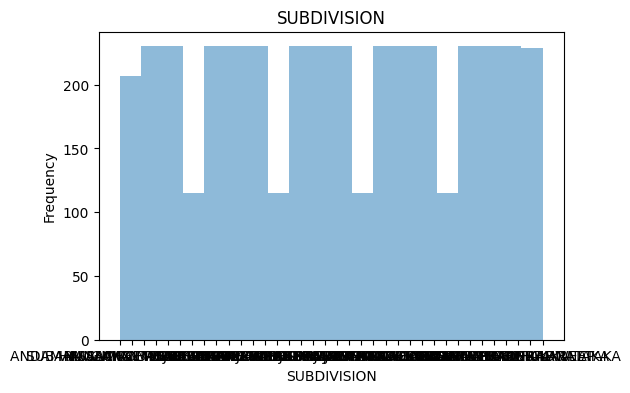

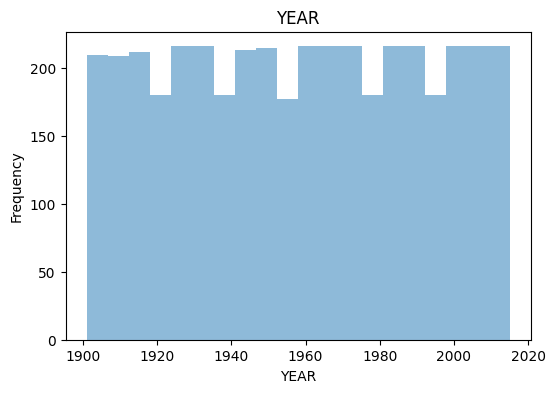

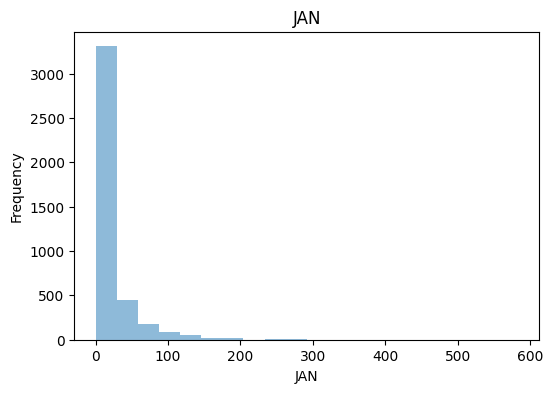

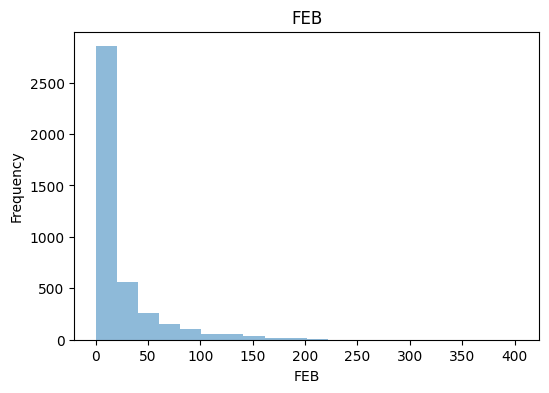

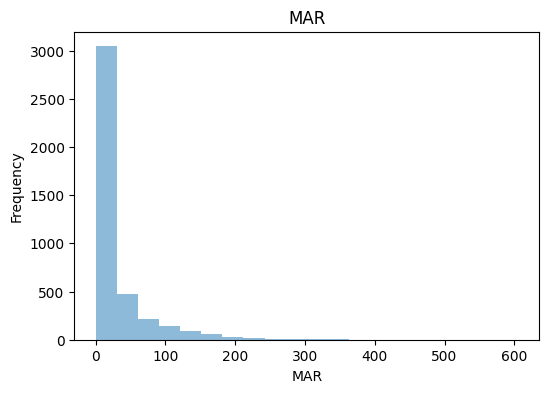

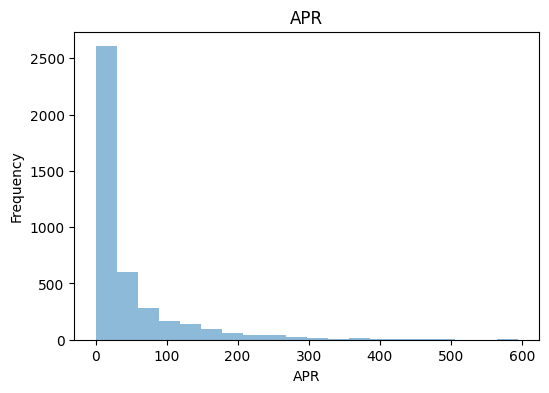

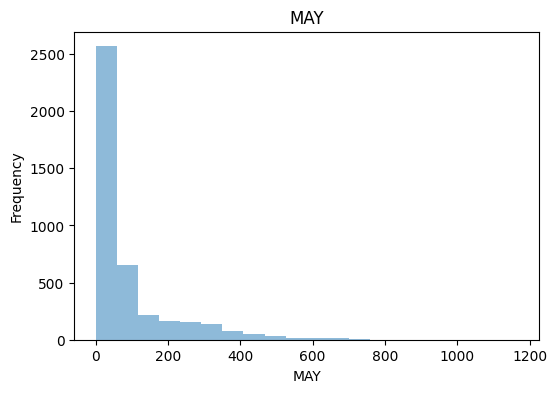

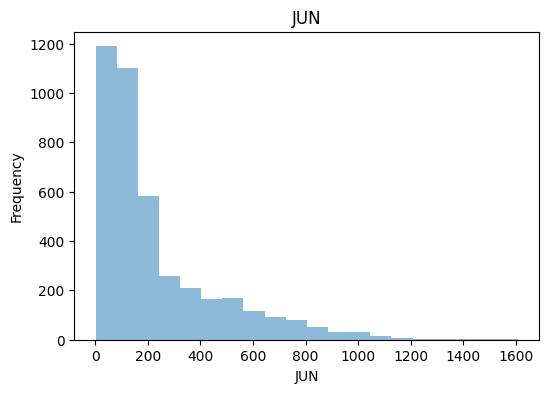

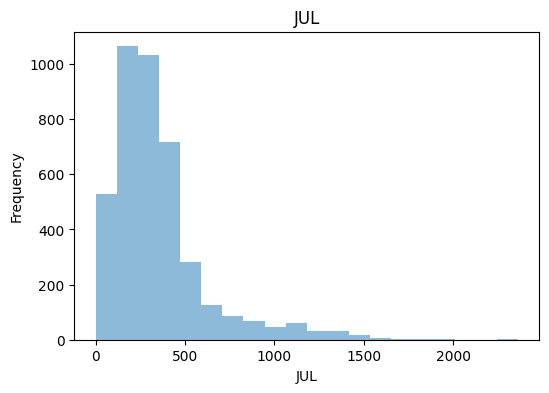

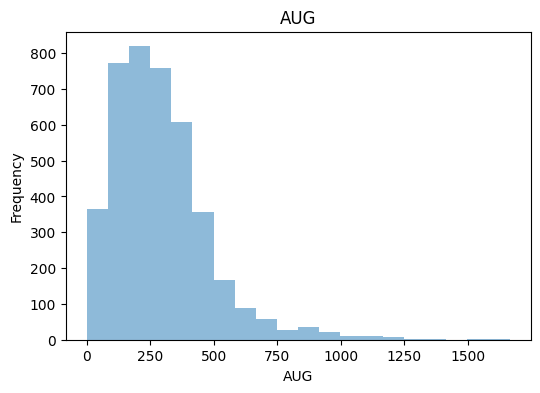

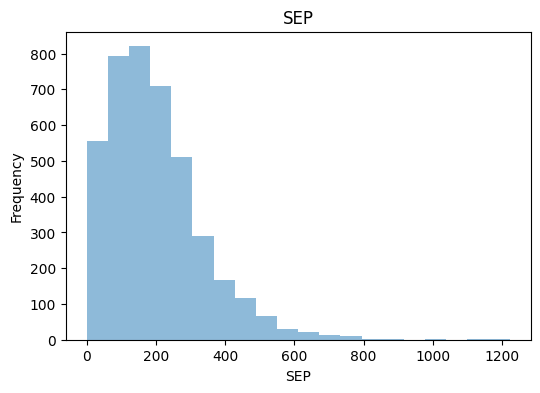

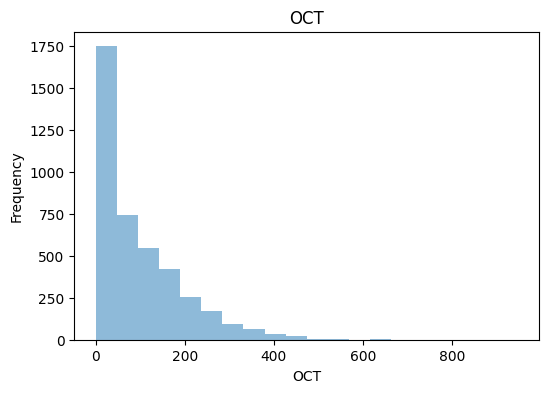

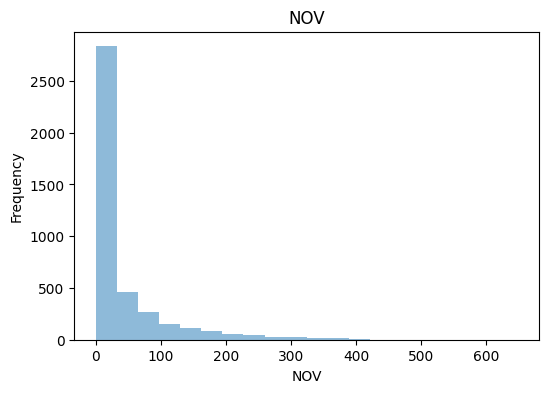

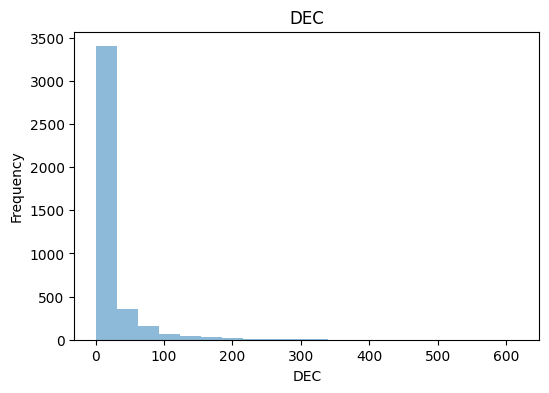

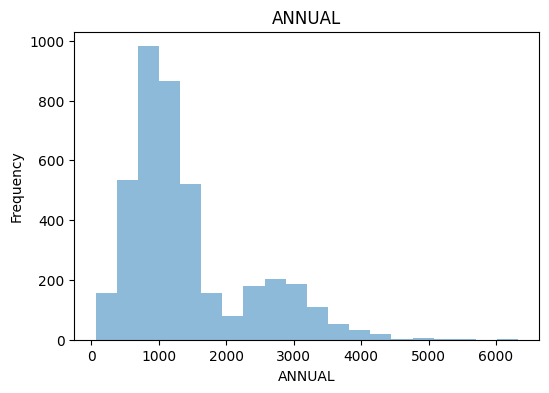

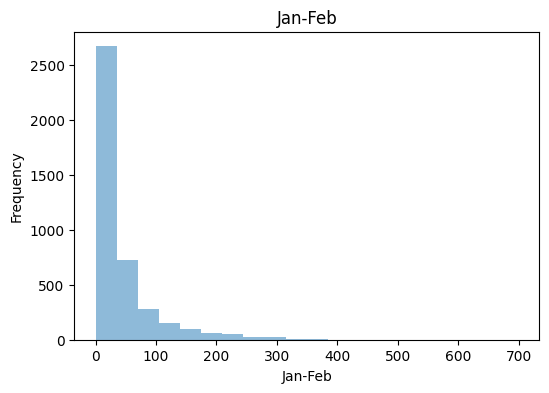

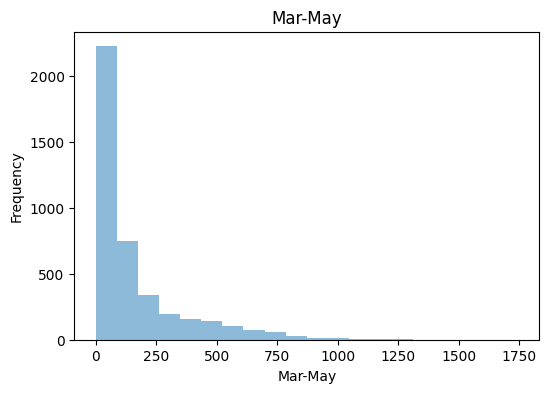

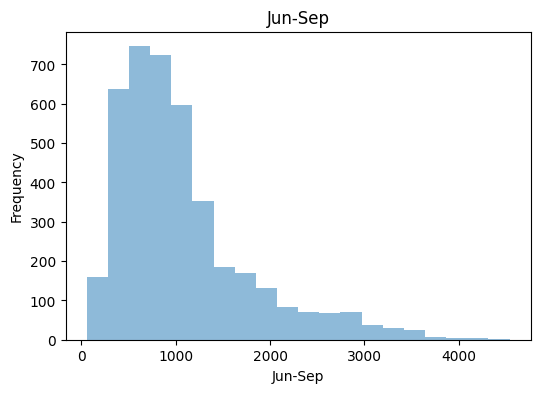

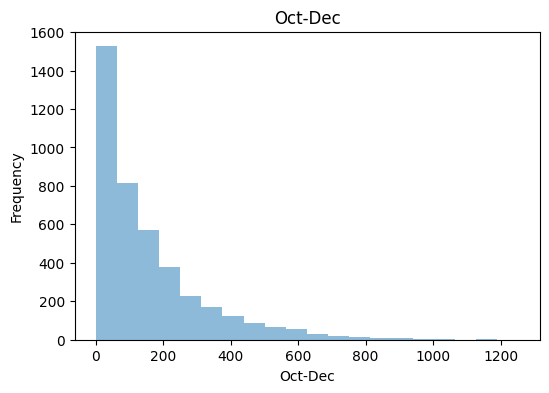

<Figure size 600x400 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
for column in data.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[column], bins=20, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"{column}")
    plt.show()
plt.figure(figsize=(6, 4))
plt.show()

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=102)
x['bias'] = 1

x = x.values
y = y.values

def linear_regression(x, y):
    x_transpose = np.transpose(x)
    x_transpose_dot_x = np.dot(x_transpose, x)
    x_transpose_dot_y = np.dot(x_transpose, y)
    coefficients = np.linalg.solve(x_transpose_dot_x, x_transpose_dot_y)
    return coefficients

coefficients = linear_regression(x, y)

y_pred = np.dot(x, coefficients)
msqe = np.mean((y - y_pred) ** 2)
print("Linear Regression")
print("Mean Squared Error:", msqe)




Linear Regression
Mean Squared Error: 9852.84269442688


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=102)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mse)
print("Linear Regression::")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)



Linear Regression::
Mean Squared Error (MSE): 10410.13145088592
Mean Absolute Error (MAE): 15.271384911767539
Root Mean Squared Error (RMSE): 102.03005170480861


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=102)

model = LinearRegression()
model.fit(x_train, y_train)

n_bootstrap_iterations = 100

mse_values = []
mae_values = []
rmse_values = []

# Perform bootstrapping
for _ in range(n_bootstrap_iterations):
    # Resample the training data with replacement
    indices = np.random.choice(len(x_train), len(x_train), replace=True)
    x_bootstrap = x_train[indices]
    y_bootstrap = y_train[indices]

    # Fit the model to the bootstrapped data
    model.fit(x_bootstrap, y_bootstrap)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Calculate performance metrics for this iteration
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Append the metrics to the respective lists
    mse_values.append(mse)
    mae_values.append(mae)
    rmse_values.append(rmse)

# Calculate and print the average and standard deviation of the metrics
avg_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
avg_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
avg_rmse = np.mean(rmse_values)
std_rmse = np.std(rmse_values)

print("Mean Squared Error (MSE) - Avg:", avg_mse, "Std:", std_mse)
print("Mean Absolute Error (MAE) - Avg:", avg_mae, "Std:", std_mae)
print("Root Mean Squared Error (RMSE) - Avg:", avg_rmse, "Std:", std_rmse)


Mean Squared Error (MSE) - Avg: 10044.868934566557 Std: 1251.7333337820544
Mean Absolute Error (MAE) - Avg: 14.50102873815202 Std: 5.129392851877141
Root Mean Squared Error (RMSE) - Avg: 100.02759896825984 Std: 6.272828645159687


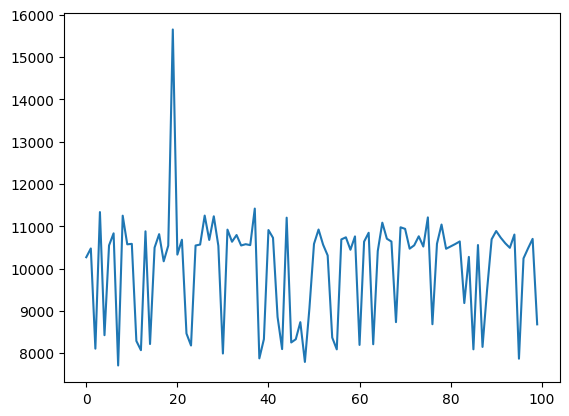

In [6]:
c=range(0,100)
plt.plot(c,mse_values)

In [7]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

svm_classifier = SVR( C=2)
svm_classifier.fit(x_train, y_train)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=102)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 680.0250428758336
Mean Squared Error (MSE): 937499.1646441491
Root Mean Squared Error (RMSE): 968.2454051758516


In [8]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

svm_classifier = SVR(C=2)

# Scale your data using Min-Max scaling
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Split the scaled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=102)

# Create empty lists to store the performance metrics for each iteration
mae_values = []
mse_values = []
rmse_values = []
r2_values = []

n_bootstrap_iterations = 100

for _ in range(n_bootstrap_iterations):
    # Resample the training data with replacement
    indices = np.random.choice(len(x_train), len(x_train), replace=True)
    x_bootstrap = x_train[indices]
    y_bootstrap = y_train[indices]

    # Fit the SVR model to the bootstrapped data
    svm_classifier.fit(x_bootstrap, y_bootstrap)

    # Make predictions on the test set
    y_pred = svm_classifier.predict(x_test)

    # Calculate performance metrics for this iteration
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Append the metrics to the respective lists
    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)
    r2_values.append(r2)

# Calculate and print the average and standard deviation of the metrics
avg_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
avg_mse = np.mean(mse_values)
std_mse = np.std(mse_values)
avg_rmse = np.mean(rmse_values)
std_rmse = np.std(rmse_values)
avg_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)
print("SVR::")
print("Mean Absolute Error (MAE) - Avg:", avg_mae, "Std:", std_mae)
print("Mean Squared Error (MSE) - Avg:", avg_mse, "Std:", std_mse)
print("Root Mean Squared Error (RMSE) - Avg:", avg_rmse, "Std:", std_rmse)
print("R-squared (R2) - Avg:", avg_r2, "Std:", std_r2)


SVR::
Mean Absolute Error (MAE) - Avg: 349.9189757850774 Std: 4.796687627299271
Mean Squared Error (MSE) - Avg: 363088.5458581977 Std: 10676.444520391742
Root Mean Squared Error (RMSE) - Avg: 602.5029679171979 Std: 8.872401544437173
R-squared (R2) - Avg: 0.5829272238662611 Std: 0.012263824915855832


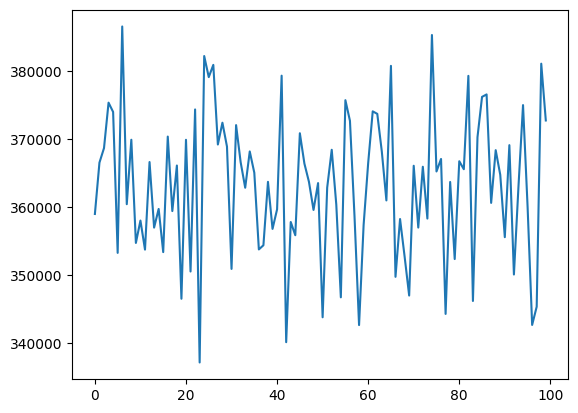

In [9]:
c=range(0,100)
plt.plot(c,mse_values)

In [10]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

coefficients = ridge.coef_
print("Coefficients:", coefficients)

Mean Squared Error: 13338.789504831147
Coefficients: [  14.2697903   139.22031927   54.0499479   -50.4460973  -327.44781977
 -481.66461595  470.23459913  913.09025066  522.24928305  486.88069663
 -236.16032439 -204.2112765  -199.91357877  429.99943331 2425.53938001
 2885.28830966 1607.45633285    0.        ]


In [11]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Create an instance of the Ridge model
ridge = Ridge(alpha=1.0)

# Create empty lists to store the performance metrics for each iteration
mse_values = []
coefficients = []

# Define the number of bootstrap iterations
n_bootstrap_iterations = 100  # You can adjust this as needed

# Perform bootstrapping
for _ in range(n_bootstrap_iterations):
    # Resample the training data with replacement
    indices = np.random.choice(len(x_train), len(x_train), replace=True)
    x_bootstrap = x_train[indices]
    y_bootstrap = y_train[indices]

    # Fit the Ridge model to the bootstrapped data
    ridge.fit(x_bootstrap, y_bootstrap)

    # Make predictions on the test set
    y_pred = ridge.predict(x_test)

    # Calculate mean squared error for this iteration
    mse = mean_squared_error(y_test, y_pred)

    # Append the MSE and coefficients to the respective lists
    mse_values.append(mse)
    coefficients.append(ridge.coef_)

# Calculate and print the average MSE
avg_mse = np.mean(mse_values)
print("Average Mean Squared Error (MSE):", avg_mse)

# Calculate and print the average coefficients
avg_coefficients = np.mean(coefficients, axis=0)
print("Average Coefficients:", avg_coefficients)


Ridge Regression::
Average Mean Squared Error (MSE): 13692.415220599798
Average Coefficients: [  14.03177064  135.42120728   53.40424981   -9.02079036 -278.74665814
 -396.1290604   536.31566891  991.76555301  589.35046596  525.77999069
 -226.66623146 -205.74066721 -178.23052826  432.13761062 2295.14032306
 2721.08898273 1596.10903415    0.        ]


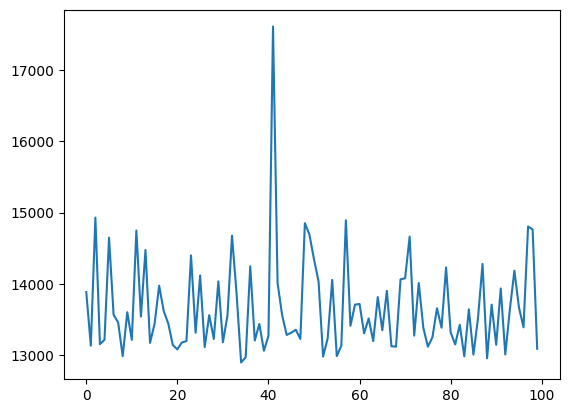

In [12]:
c=range(0,100)
plt.plot(c,mse_values)

In [13]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=1.0)

lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 13476.385098651996


In [14]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Create an instance of the Lasso model
lasso = Lasso(alpha=1.0)

# Create empty lists to store the performance metrics for each iteration
mse_values = []

# Define the number of bootstrap iterations
n_bootstrap_iterations = 100  # You can adjust this as needed

# Perform bootstrapping
for _ in range(n_bootstrap_iterations):
    # Resample the training data with replacement
    indices = np.random.choice(len(x_train), len(x_train), replace=True)
    x_bootstrap = x_train[indices]
    y_bootstrap = y_train[indices]

    # Fit the Lasso model to the bootstrapped data
    lasso.fit(x_bootstrap, y_bootstrap)

    # Make predictions on the test set
    y_pred = lasso.predict(x_test)

    # Calculate mean squared error for this iteration
    mse = mean_squared_error(y_test, y_pred)

    # Append the MSE to the mse_values list
    mse_values.append(mse)

# Calculate and print the average MSE
avg_mse = np.mean(mse_values)
print("Average Mean Squared Error (MSE):", avg_mse)


Average Mean Squared Error (MSE): 13639.81481496143


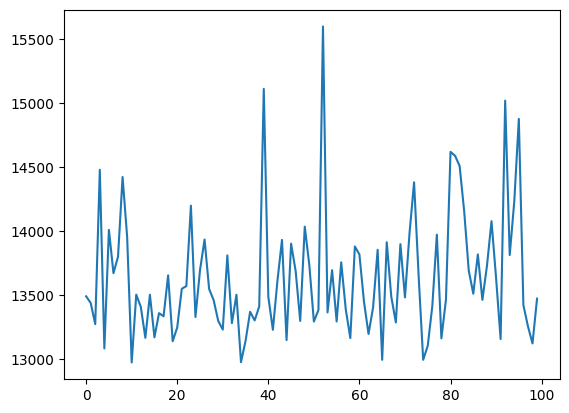

In [15]:
c=range(0,100)
plt.plot(c,mse_values)

In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

y_pred = knn_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 38020.98672475729


In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Create an instance of the KNeighborsRegressor model
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Create empty lists to store the performance metrics for each iteration
mse_values = []

# Define the number of bootstrap iterations
n_bootstrap_iterations = 100  # You can adjust this as needed

# Perform bootstrapping
for _ in range(n_bootstrap_iterations):
    # Resample the training data with replacement
    indices = np.random.choice(len(x_train), len(x_train), replace=True)
    x_bootstrap = x_train[indices]
    y_bootstrap = y_train[indices]

    # Fit the KNN Regression model to the bootstrapped data
    knn_regressor.fit(x_bootstrap, y_bootstrap)

    # Make predictions on the test set
    y_pred = knn_regressor.predict(x_test)

    # Calculate mean squared error for this iteration
    mse = mean_squared_error(y_test, y_pred)

    # Append the MSE to the mse_values list
    mse_values.append(mse)

# Calculate and print the average MSE
avg_mse = np.mean(mse_values)
print("KNN::")
print("Average Mean Squared Error (MSE):", avg_mse)


KNN::
Average Mean Squared Error (MSE): 47289.737676567966


In [18]:
c=range(0,100)

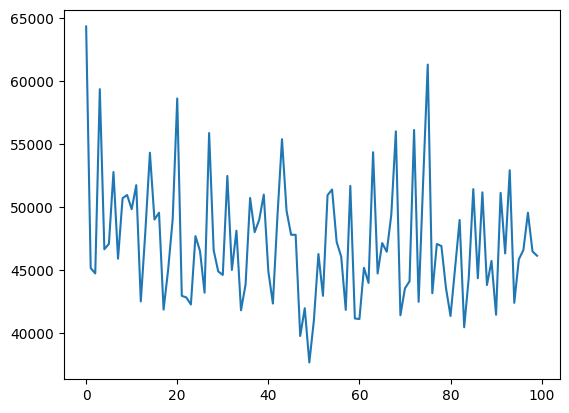

In [19]:
plt.plot(c,mse_values)